# Car Price Prediction 

### Imporitng libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing csv data as pandas DataFrame
car = pd.read_csv('../data/car_price_prediction.csv')

In [3]:
# sample view of DataFrame
car.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
14602,45778710,3136,-,VOLKSWAGEN,Jetta,1990,Sedan,No,CNG,1.8,500 km,4.0,Manual,Front,04-May,Left wheel,Blue,0
2360,45319704,21500,-,MERCEDES-BENZ,ML 280 სასწრაფოდ,2007,Jeep,Yes,Diesel,3,215000 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,8
13388,45631422,7056,915,BMW,X5,2014,Jeep,Yes,Diesel,3,141384 km,6.0,Automatic,4x4,04-May,Left wheel,Blue,0
14704,45751259,13328,609,TOYOTA,RAV 4,2018,Sedan,Yes,Hybrid,2.5,73646 km,4.0,Automatic,4x4,04-May,Left wheel,Grey,12
16873,45789705,94083,-,BMW,X5,2015,Jeep,Yes,Petrol,3.0 Turbo,56000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12
9565,45787051,5331,-,UAZ,31514,1990,Jeep,No,Petrol,2.4,0 km,4.0,Manual,4x4,04-May,Left wheel,Black,0
6840,45780832,6586,-,TOYOTA,Vitz,1999,Hatchback,No,Petrol,1,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Red,2
14563,45804607,58579,880,HYUNDAI,Tucson,2018,Jeep,Yes,Petrol,1.6,24998 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
17306,45794808,6899,-,SUZUKI,XL7,2001,Jeep,No,CNG,2.7,170000 km,6.0,Automatic,4x4,04-May,Left wheel,Golden,8
18216,45727038,16308,707,SSANGYONG,Korando,2011,Jeep,Yes,Diesel,2,248871 km,4.0,Automatic,Front,04-May,Left wheel,White,4


### Data Preprocessing

- checking for null values
- checking for duplicate values
- checking for datatypes

In [4]:
# checking shape of data
car.shape

(19237, 18)

In [5]:
# checking for null values
car.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
car.duplicated().sum()

313

In [7]:
car.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
def valCount(column):
    print("Column Name --> ", column)
    print(car[column].value_counts())
    
valCount('Levy')

Column Name -->  Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64


In [10]:
for column in car.columns[3:]:
    valCount(column)

Column Name -->  Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
Column Name -->  Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64
Column Name -->  Prod. year
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
2018     500
2007     464
2005     402
2003     367
2004     364
2006     317
2019     306
2002     296
2000     279
2001     254
19

## Insights

- There are many duplicates values, we need to remove it
- Mileage column has a "km" attached with it's value
- Price column have very disturbed data
- 'Manufacturer' column has "სხვა" value in it
- Replace '-' values with mean in 'Levy' column
- 'Cylinders' column has values lesser than 4 which is not expected
- Engine volume have 'Turbo' in certain values, need separate column for Turbo
- Change '4x4' values in 'Drive wheels' column
- Channge the values in 'Doors' column
- Remove the 'Hydrogen' value from 'Fuel type' column

#### Removing Duplicate Values

In [11]:
# removing duplicated values
car = car[~car.duplicated()]

In [12]:
car.duplicated().sum()

0

#### updating "Mileage" column

In [13]:
# removing "km" from mileage data and converting it into int
car['Mileage'] = car['Mileage'].str.replace(' km', '').astype(int)

In [14]:
car['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int32

#### Updating "Price" column

In [15]:
sorted(car['Price'])

[1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 28,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 33,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,

In [16]:
car['Price'].mean()

18587.435267385332

In [17]:
print("Lower limit in Price: ", car['Price'].mean() - 3*car['Price'].std())
print("Upper limit in Price: ", car['Price'].mean() + 3*car['Price'].std())

Lower limit in Price:  -557819.4569119934
Upper limit in Price:  594994.3274467641


In [18]:
print("Price lower than 300 in columns: ", len(car[car['Price'] < 300]))
print("Price greater than 1,00,000 in columns: ", len(car[car['Price'] > 100000]))

Price lower than 300 in columns:  882
Price greater than 1,00,000 in columns:  111


C:\Users\Golden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


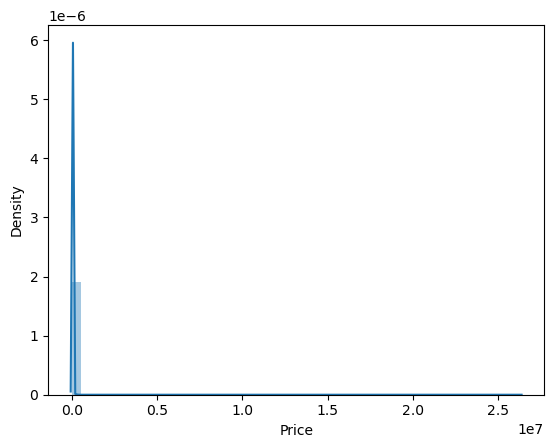

In [19]:
sns.distplot(car['Price'])
plt.show()

#### Removing Outliers from Price column

In [20]:
# filter out rows where 'Price' is lower than 300 and greater than 1,00,000
car = car[~((car['Price'] <= 500) | (car['Price'] >= 100000))]

C:\Users\Golden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


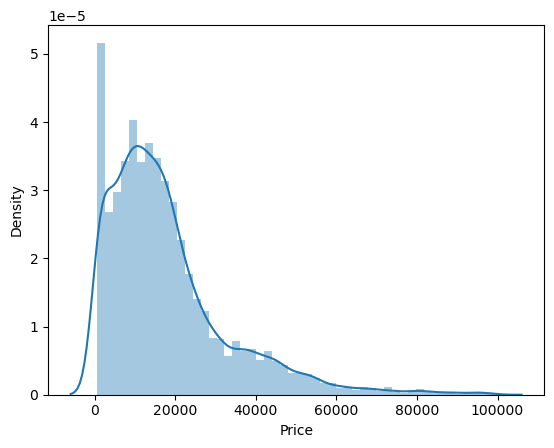

In [21]:
sns.distplot(car['Price'])
plt.show()

C:\Users\Golden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


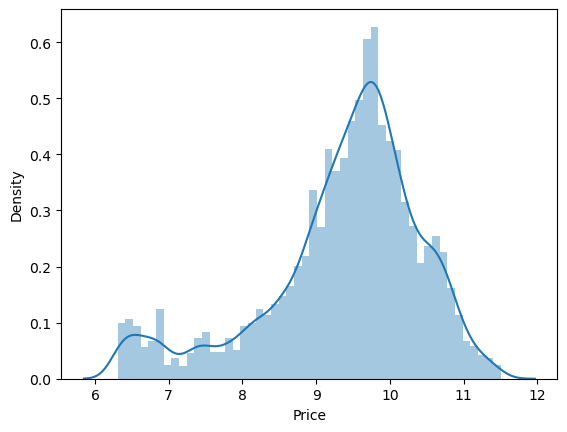

In [22]:
sns.distplot(np.log(car['Price']))
plt.show()

#### Removing data which has 'Manufacturer' value as "სხვა"

In [23]:
car['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'LINCOLN', 'VAZ', 'GAZ', 'CITROEN',
       'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR', 'ISUZU',
       'ACURA', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION', 'UAZ',
       'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'SAAB', 'FERRARI', 'PONTIAC', 'SATURN', 'ASTON MARTIN',
       'GREATWALL'], dtype=object)

In [24]:
len(car[car['Manufacturer'] == 'სხვა'])

2

In [25]:
car[car['Manufacturer'] == 'სხვა']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2358,45779593,25089,-,სხვა,IVECO DAYLY,2007,Microbus,No,Diesel,2.3 Turbo,328000,4.0,Manual,Rear,04-May,Left wheel,White,1
4792,39223518,9408,-,სხვა,GONOW,2005,Jeep,Yes,Petrol,2.3,102000,4.0,Manual,Rear,04-May,Left wheel,Silver,2


In [26]:
car = car[car['Manufacturer'] != 'სხვა']

#### Replacing '-' values with mean in 'Levy' column and changing its datatype into int

In [27]:
valCount('Levy')

Column Name -->  Levy
-       5285
765      471
891      447
639      395
640      366
        ... 
2082       1
3008       1
1516       1
1699       1
1045       1
Name: Levy, Length: 542, dtype: int64


In [28]:
goodValues = car[car['Levy'] != '-']


In [29]:
goodValues['Levy'] = goodValues['Levy'].astype(int)

C:\Users\Golden\AppData\Local\Temp\ipykernel_2568\2995266958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodValues['Levy'] = goodValues['Levy'].astype(int)


In [30]:
levyMean = goodValues['Levy'].mean()

In [31]:
levyMean

896.0973004793541

In [32]:
car['Levy'] = car['Levy'].replace('-',int(levyMean)).astype(int)

In [33]:
valCount('Levy')

Column Name -->  Levy
896     5285
765      471
891      447
639      395
640      366
        ... 
2082       1
3008       1
1516       1
1699       1
1045       1
Name: Levy, Length: 542, dtype: int64


#### Changing the values in 'Doors' column

In [34]:
valCount('Doors')

Column Name -->  Doors
04-May    16325
02-Mar      738
>5          113
Name: Doors, dtype: int64


In [35]:
car['Doors'] = car['Doors'].replace('04-May',4)
car['Doors'] = car['Doors'].replace('02-Mar',2)
car['Doors'] = car['Doors'].replace('>5',5)

In [36]:
valCount('Doors')

Column Name -->  Doors
4    16325
2      738
5      113
Name: Doors, dtype: int64


#### 'Cylinders' column has values lesser than 4 which is not expected

In [37]:
cylinCounts = car['Cylinders'].value_counts()

In [38]:
cylinCounts

4.0     13068
6.0      2919
8.0       803
5.0       155
3.0       106
2.0        39
1.0        34
12.0       32
10.0       11
16.0        5
7.0         2
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [39]:
cylinCounts = cylinCounts[cylinCounts >= 4]

In [40]:
cylinCounts

4.0     13068
6.0      2919
8.0       803
5.0       155
3.0       106
2.0        39
1.0        34
12.0       32
10.0       11
16.0        5
Name: Cylinders, dtype: int64

In [41]:
values_to_keep = cylinCounts.index.tolist()
values_to_keep

[4.0, 6.0, 8.0, 5.0, 3.0, 2.0, 1.0, 12.0, 10.0, 16.0]

In [42]:
car = car[car['Cylinders'].isin(values_to_keep)]

In [43]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,896,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12
19232,45798355,8467,896,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4


#### Removing the 'Hydrogen' value from 'Fuel type' column

In [44]:
car = car[car['Fuel type'] != 'Hydrogen']

#### Changing '4x4' values in 'Drive wheels' column

In [45]:
valCount('Drive wheels')

Column Name -->  Drive wheels
Front    11743
4x4       3359
Rear      2069
Name: Drive wheels, dtype: int64


In [46]:
car['Drive wheels'] = car['Drive wheels'].str.replace('4x4','Four')

C:\Users\Golden\AppData\Local\Temp\ipykernel_2568\3656399499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Drive wheels'] = car['Drive wheels'].str.replace('4x4','Four')


In [47]:
valCount('Drive wheels')

Column Name -->  Drive wheels
Front    11743
Four      3359
Rear      2069
Name: Drive wheels, dtype: int64


#### 'Engine volume' have 'Turbo' in certain values, need separate column for Turbo

In [48]:
valCount('Engine volume')

Column Name -->  Engine volume
2            3643
2.5          2019
1.8          1554
1.6          1396
1.5          1174
             ... 
0.2 Turbo       1
3.1             1
6.7             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 104, dtype: int64


In [49]:
car['Turbo'] = car['Engine volume'].str.contains('Turbo').astype(int)

C:\Users\Golden\AppData\Local\Temp\ipykernel_2568\1218506523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Turbo'] = car['Engine volume'].str.contains('Turbo').astype(int)


In [50]:
valCount('Turbo')

Column Name -->  Turbo
0    15373
1     1798
Name: Turbo, dtype: int64


In [51]:
car['Engine volume'] = car['Engine volume'].str.replace(' Turbo', '')

C:\Users\Golden\AppData\Local\Temp\ipykernel_2568\2356918558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Engine volume'] = car['Engine volume'].str.replace(' Turbo', '')


In [52]:
car['Engine volume'] = car['Engine volume'].astype(float)

C:\Users\Golden\AppData\Local\Temp\ipykernel_2568\3828851363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Engine volume'] = car['Engine volume'].astype(float)


In [53]:
car['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19231    3.5
19232    2.0
19233    2.4
19234    2.0
19235    2.0
Name: Engine volume, Length: 17171, dtype: float64

In [54]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,Four,4,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,Four,4,Left wheel,Black,8,0
2,45774419,8467,896,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,Four,4,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,0
19232,45798355,8467,896,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,0


In [55]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17171 entries, 0 to 19235
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17171 non-null  int64  
 1   Price             17171 non-null  int64  
 2   Levy              17171 non-null  int32  
 3   Manufacturer      17171 non-null  object 
 4   Model             17171 non-null  object 
 5   Prod. year        17171 non-null  int64  
 6   Category          17171 non-null  object 
 7   Leather interior  17171 non-null  object 
 8   Fuel type         17171 non-null  object 
 9   Engine volume     17171 non-null  float64
 10  Mileage           17171 non-null  int32  
 11  Cylinders         17171 non-null  float64
 12  Gear box type     17171 non-null  object 
 13  Drive wheels      17171 non-null  object 
 14  Doors             17171 non-null  int64  
 15  Wheel             17171 non-null  object 
 16  Color             17171 non-null  object

In [56]:
car = car.reset_index(drop=True)

In [68]:
# creating and saving this cleaned DataFrame into another csv file
# car.to_csv('../data/cleaned_car_price.csv', index = False)

In [69]:
cleaned_car = pd.read_csv('../data/cleaned_car_price.csv')

In [70]:
cleaned_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17171 entries, 0 to 17170
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17171 non-null  int64  
 1   Price             17171 non-null  int64  
 2   Levy              17171 non-null  int64  
 3   Manufacturer      17171 non-null  object 
 4   Model             17171 non-null  object 
 5   Prod. year        17171 non-null  int64  
 6   Category          17171 non-null  object 
 7   Leather interior  17171 non-null  object 
 8   Fuel type         17171 non-null  object 
 9   Engine volume     17171 non-null  float64
 10  Mileage           17171 non-null  int64  
 11  Cylinders         17171 non-null  float64
 12  Gear box type     17171 non-null  object 
 13  Drive wheels      17171 non-null  object 
 14  Doors             17171 non-null  int64  
 15  Wheel             17171 non-null  object 
 16  Color             17171 non-null  object